In [ ]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part A

In [ ]:
os.chdir('/content/drive/My Drive/CV/HW1')

hist1_img = cv2.imread('Hist1.webp')
hist2_img = cv2.imread('Hist2.webp')

In [ ]:
cv2_imshow(hist1_img)
cv2_imshow(hist2_img)

In [ ]:
cv2_imshow(cv2.cvtColor(hist1_img,cv2.COLOR_BGR2GRAY ))
cv2_imshow(cv2.cvtColor(hist2_img,cv2.COLOR_BGR2GRAY ))

## Part B

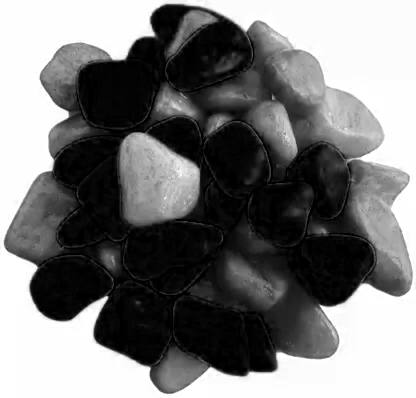

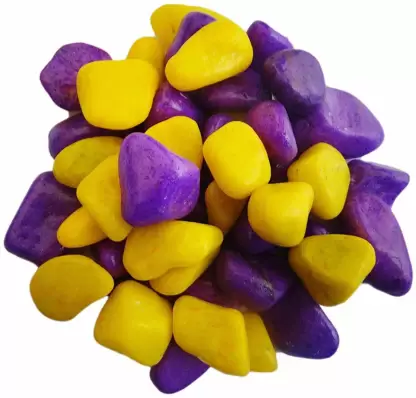

In [ ]:
hist1_img = cv2.imread('Hist1.webp')
gray_img = np.zeros(shape=[hist1_img.shape[0],hist1_img.shape[1]])
gray_img1 = np.zeros(shape=[hist1_img.shape[0],hist1_img.shape[1]])
for i in range(hist1_img.shape[0]):
  for j in range(hist1_img.shape[1]):
    gray_img1[i,j] = (1 * hist1_img[i,j,0])
cv2_imshow(gray_img1)
cv2_imshow(hist1_img)

## Part C

In [ ]:
def illumination_correction(L_ch):
  gamma = 0.9
  gamma1 = 1.005
  for row in range(L_ch.shape[0]):
    for col in range(L_ch.shape[1]):
      if col < 300:
        L_ch[row,col] = L_ch[row,col] ** gamma
      else: 
        L_ch[row,col] = L_ch[row,col] ** gamma1
      # L_ch[row,col] = math.log(1 + L_ch[row,col],2)
  # cv2_imshow(L_ch)
  return L_ch


img = cv2.imread('illumination.png')
cv2_imshow(img)
lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
# print('                           source image in LAB color space')
# cv2_imshow(lab_img[:,:,0])

L_ch = illumination_correction(lab_img[:,:,0])
lab_img[:,:,0] = L_ch
print('\n')
rgb_img = cv2.cvtColor(lab_img, cv2.COLOR_LAB2BGR)
print('                           refined image in RGB color space')
cv2_imshow(rgb_img)

                           source image in RGB color space


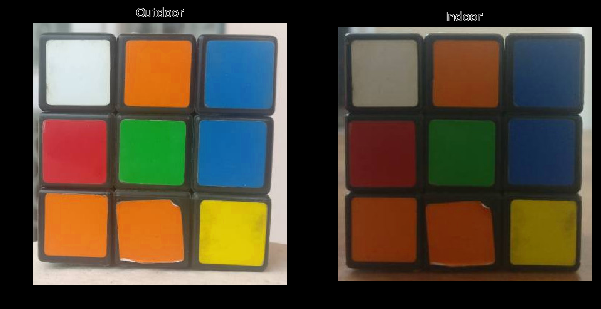



                           refined image in RGB color space


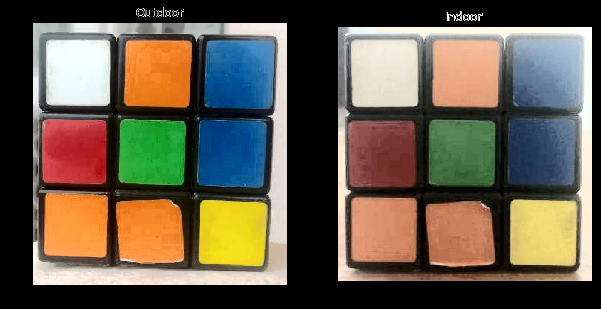

In [ ]:
def illumination_correction(L_ch):
  left = cv2.equalizeHist(L_ch[:,0:300])
  right = cv2.equalizeHist(L_ch[:,300:])
  L_ch[:,0:300] = left
  L_ch[:,300:] = right
  return L_ch

img = cv2.imread('illumination.png')
print('                           source image in RGB color space')
img[img[:,:,0]==255] = 0
cv2_imshow(img)
lab_img = cv2.cvtColor(img, cv2.COLOR_BGRHSV)
L_ch = illumination_correction(lab_img[:,:,0])
# new_ch = cv2.equalizeHist(lab_img[:,:,0])
lab_img[:,:,0] = L_ch
print('\n')
rgb_img = cv2.cvtColor(lab_img, cv2.COLOR_HSV2BGR)
print('                           refined image in RGB color space')
cv2_imshow(rgb_img)

## Part E

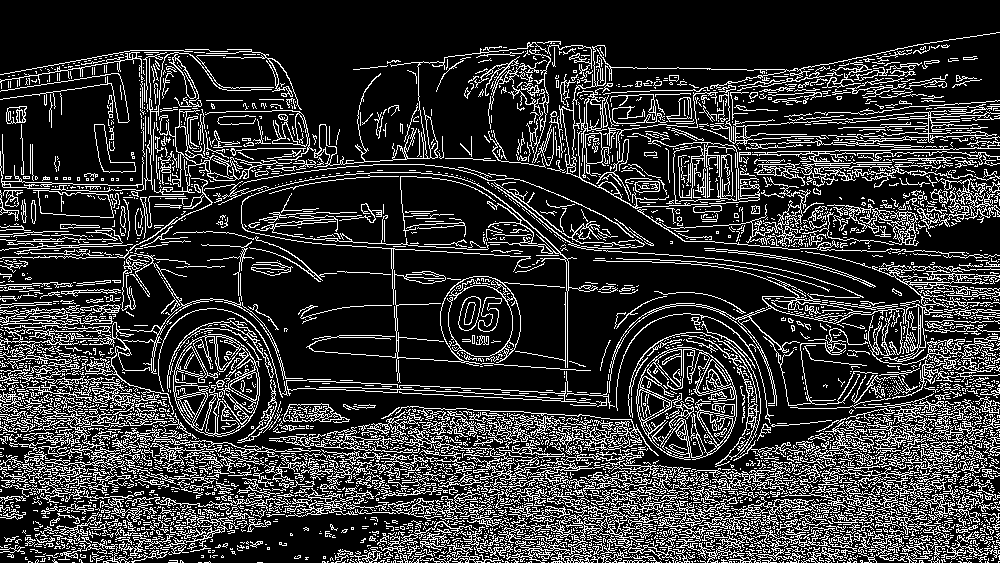

In [ ]:
img = cv2.imread('edge.webp')
edge = cv2.Canny(img, 80,180)
cv2_imshow(edge)
smoothed_img = cv2.GaussianBlur(img,(15,15),2.5)
edge2 = cv2.Canny(smoothed_img,80,180)
cv2_imshow(edge2)